In [1]:
import os 
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
# from xgboost import XGBClassifier


In [3]:
from sklearn.metrics import classification_report, accuracy_score,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import  LogisticRegression
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
import operator
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
# os.chdir("D:/GreyAtom/Hackathon/hotstar_dataset")
df = pd.read_json("train_data.json")

In [5]:
dfT = df.T
dfT.head()

,cities,dow,genres,segment,titles,tod
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","18:1372,21:1862,17:320"
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"India vs Australia 1st Test Hindi:83,India vs ...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2..."
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"Rangoon:77,India A vs England XI:3883,Kaabil:122","10:122,12:77,15:1800,14:0,16:2083"
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,Koffee With Karan:8529,"20:529,21:1257,22:4930,23:538,19:1268,18:6"


In [6]:
dfT["titles"]=dfT["titles"].str.split(",")
dfT["titles_count"]=dfT["titles"].apply(lambda x:len(x))

In [7]:
dfT.head()

,cities,dow,genres,segment,titles,tod,titles_count
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"[Wild Sex:79, Vintage Dhoni Comes Good with 13...","18:1372,21:1862,17:320",9
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",33
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"[India vs Australia 1st Test Hindi:83, India v...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",17
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"[Rangoon:77, India A vs England XI:3883, Kaabi...","10:122,12:77,15:1800,14:0,16:2083",3
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,[Koffee With Karan:8529],"20:529,21:1257,22:4930,23:538,19:1268,18:6",1


In [8]:
Metros = ["mumbai", "gurgaon", "kolkata", "delhi", "chennai", "bangalore", "pune", "hyderabad", "new delhi", "delhi", "navi mumbai"]

dfT["city_only"] = dfT["cities"].apply(lambda x: [i.rsplit(":")[0] for i in x.rsplit(",")])
dfT["metro"] = dfT["city_only"].apply(lambda x: sum([1 for i in x if i in Metros]))
dfT['non_metro'] = dfT['city_only'].apply(lambda x: sum([1 for i in x if i not in Metros]))

In [9]:
dfT.head()

,cities,dow,genres,segment,titles,tod,titles_count,city_only,metro,non_metro
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"[Wild Sex:79, Vintage Dhoni Comes Good with 13...","18:1372,21:1862,17:320",9,"[delhi, mumbai]",2,0
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",33,"[ahmedabad, mumbai]",1,1
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"[India vs Australia 1st Test Hindi:83, India v...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",17,[navi mumbai],1,0
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"[Rangoon:77, India A vs England XI:3883, Kaabi...","10:122,12:77,15:1800,14:0,16:2083",3,"[chennai, navi mumbai, mumbai]",3,0
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,[Koffee With Karan:8529],"20:529,21:1257,22:4930,23:538,19:1268,18:6",1,"[bangalore, krishnarajapura, hosur]",1,2


In [10]:
dfT["final_hour"] = dfT["tod"].apply(lambda x: [i.rsplit(":")[0] for i in x.rsplit(",")])

dfT["Morning Viewer"] = dfT["final_hour"].apply(lambda x: sum([1 for i in x if int(i)<=12]))
dfT["Afternoon Viewers"] = dfT["final_hour"].apply(lambda x: sum([1 for i in x if int(i)>12 and int(i)<17]))
dfT["Evening Viewers"] = dfT["final_hour"].apply(lambda x:sum([1 for i in x if int(i)>=17 and int(i)<20]))
dfT["Night Viewers"] = dfT["final_hour"].apply(lambda x: sum([1 for i in x if int(i)>=20 and int(i)<=24]))

In [11]:
dfT.head()

,cities,dow,genres,segment,titles,tod,titles_count,city_only,metro,non_metro,final_hour,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"[Wild Sex:79, Vintage Dhoni Comes Good with 13...","18:1372,21:1862,17:320",9,"[delhi, mumbai]",2,0,"[18, 21, 17]",0,0,2,1
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",33,"[ahmedabad, mumbai]",1,1,"[11, 10, 13, 12, 20, 21, 17, 16, 19, 18, 23, 2...",7,4,3,4
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"[India vs Australia 1st Test Hindi:83, India v...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",17,[navi mumbai],1,0,"[11, 10, 13, 12, 20, 14, 22, 23, 19, 18, 8, 7,...",7,3,2,4
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"[Rangoon:77, India A vs England XI:3883, Kaabi...","10:122,12:77,15:1800,14:0,16:2083",3,"[chennai, navi mumbai, mumbai]",3,0,"[10, 12, 15, 14, 16]",2,3,0,0
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,[Koffee With Karan:8529],"20:529,21:1257,22:4930,23:538,19:1268,18:6",1,"[bangalore, krishnarajapura, hosur]",1,2,"[20, 21, 22, 23, 19, 18]",0,0,2,4


In [12]:
weekdays = [2, 3, 4, 5, 6]
dfT["dow_list"] = dfT["dow"].apply(lambda x: [i.rsplit(":")[0] for i in x.rsplit(",")])

# dfT["Sunday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 1]))
# dfT["Monday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 2]))
# dfT["Tuesday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 3]))
# dfT["Wednesday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 4]))
# dfT["Thursday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 5]))
# dfT["Friday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 6]))
# dfT["Saturday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) == 7]))

dfT["Weekday"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) in weekdays]))
dfT["Weekend"] = dfT["dow_list"].apply(lambda x: sum([1 for i in x if int(i) not in weekdays]))

In [13]:
dfT.head()

,cities,dow,genres,segment,titles,tod,titles_count,city_only,metro,non_metro,final_hour,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers,dow_list,Weekday,Weekend
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"[Wild Sex:79, Vintage Dhoni Comes Good with 13...","18:1372,21:1862,17:320",9,"[delhi, mumbai]",2,0,"[18, 21, 17]",0,0,2,1,"[5, 4, 7]",2,1
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",33,"[ahmedabad, mumbai]",1,1,"[11, 10, 13, 12, 20, 21, 17, 16, 19, 18, 23, 2...",7,4,3,4,"[1, 3, 2, 5, 4, 7, 6]",5,2
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"[India vs Australia 1st Test Hindi:83, India v...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",17,[navi mumbai],1,0,"[11, 10, 13, 12, 20, 14, 22, 23, 19, 18, 8, 7,...",7,3,2,4,"[1, 3, 2, 5, 4, 7, 6]",5,2
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"[Rangoon:77, India A vs England XI:3883, Kaabi...","10:122,12:77,15:1800,14:0,16:2083",3,"[chennai, navi mumbai, mumbai]",3,0,"[10, 12, 15, 14, 16]",2,3,0,0,"[1, 2, 5]",2,1
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,[Koffee With Karan:8529],"20:529,21:1257,22:4930,23:538,19:1268,18:6",1,"[bangalore, krishnarajapura, hosur]",1,2,"[20, 21, 22, 23, 19, 18]",0,0,2,4,"[1, 3]",1,1


In [14]:
Sports = ['Cricket', 'Football', 'Badminton', 'Sport', 'Formula1', 'Hockey', 'Kabaddi', 'Table Tennis', 'Tennis', 'Volleyball', 'Athletics', 'FormulaE', 'Boxing', 'Swimming', 'IndiaVsSa']
Television = ['Wildlife', 'LiveTV', 'TalkShow', 'Reality', 'Awards', 'Travel', 'Science', 'Documentary', 'Mythology', 'Kids']
Movies = ['Drama', 'Family', 'Crime', 'Romance', 'Action', 'Comedy', 'Thriller', 'Teen', 'Horror', 'NA']

dfT["genres_list"] = dfT["genres"].apply(lambda x: [i.rsplit(":")[0] for i in x.rsplit(",")])

# genres_count = {}
# for i in dfT['genres']:
#     for j in (i.split(',')):
#         if j.split(':')[0] not in genres_count:
#              genres_count[j.split(':')[0]]= 1
#         else:
#              genres_count[j.split(':')[0]] += 1

# for key, value in genres_count.items():
#     dfT[key] = ""
#     dfT[key] = dfT["genres_list"].apply(lambda x: sum([1 for i in x if i == key]))

dfT['Sports'] = dfT["genres_list"].apply(lambda x: sum([1 for i in x if i in Sports]))
dfT['Television'] = dfT["genres_list"].apply(lambda x: sum([1 for i in x if i in Television]))
dfT['Movies'] = dfT["genres_list"].apply(lambda x: sum([1 for i in x if i in Movies]))

In [15]:
dfT.head()

,cities,dow,genres,segment,titles,tod,titles_count,city_only,metro,non_metro,...,Afternoon Viewers,Evening Viewers,Night Viewers,dow_list,Weekday,Weekend,genres_list,Sports,Television,Movies
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"[Wild Sex:79, Vintage Dhoni Comes Good with 13...","18:1372,21:1862,17:320",9,"[delhi, mumbai]",2,0,...,0,2,1,"[5, 4, 7]",2,1,"[Drama, Cricket, Wildlife]",1,1,1
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",33,"[ahmedabad, mumbai]",1,1,...,4,3,4,"[1, 3, 2, 5, 4, 7, 6]",5,2,"[Drama, Family, Crime, Romance, Action, Comedy]",0,0,6
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"[India vs Australia 1st Test Hindi:83, India v...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",17,[navi mumbai],1,0,...,3,2,4,"[1, 3, 2, 5, 4, 7, 6]",5,2,"[Cricket, Family, Drama, LiveTV, Action, Comedy]",1,1,4
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"[Rangoon:77, India A vs England XI:3883, Kaabi...","10:122,12:77,15:1800,14:0,16:2083",3,"[chennai, navi mumbai, mumbai]",3,0,...,3,0,0,"[1, 2, 5]",2,1,"[Romance, Drama, Cricket]",1,0,2
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,[Koffee With Karan:8529],"20:529,21:1257,22:4930,23:538,19:1268,18:6",1,"[bangalore, krishnarajapura, hosur]",1,2,...,0,2,4,"[1, 3]",1,1,[TalkShow],0,1,0


In [16]:
dfT["viewing_time_only"]=dfT["tod"].apply(lambda x: [i.split(":")[1] for i in x.split(",")])
dfT["Summed_time"]=dfT["viewing_time_only"].apply(lambda x: sum([int(i) for i in x ]))


In [17]:
dfT.head()

,cities,dow,genres,segment,titles,tod,titles_count,city_only,metro,non_metro,...,Night Viewers,dow_list,Weekday,Weekend,genres_list,Sports,Television,Movies,viewing_time_only,Summed_time
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"[Wild Sex:79, Vintage Dhoni Comes Good with 13...","18:1372,21:1862,17:320",9,"[delhi, mumbai]",2,0,...,1,"[5, 4, 7]",2,1,"[Drama, Cricket, Wildlife]",1,1,1,"[1372, 1862, 320]",3554
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",33,"[ahmedabad, mumbai]",1,1,...,4,"[1, 3, 2, 5, 4, 7, 6]",5,2,"[Drama, Family, Crime, Romance, Action, Comedy]",0,0,6,"[7726, 3521, 2067, 3844, 4608, 9360, 5734, 443...",83635
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"[India vs Australia 1st Test Hindi:83, India v...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",17,[navi mumbai],1,0,...,4,"[1, 3, 2, 5, 4, 7, 6]",5,2,"[Cricket, Family, Drama, LiveTV, Action, Comedy]",1,1,4,"[302, 1594, 331, 133, 3802, 3083, 2219, 2111, ...",29396
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"[Rangoon:77, India A vs England XI:3883, Kaabi...","10:122,12:77,15:1800,14:0,16:2083",3,"[chennai, navi mumbai, mumbai]",3,0,...,0,"[1, 2, 5]",2,1,"[Romance, Drama, Cricket]",1,0,2,"[122, 77, 1800, 0, 2083]",4082
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,[Koffee With Karan:8529],"20:529,21:1257,22:4930,23:538,19:1268,18:6",1,"[bangalore, krishnarajapura, hosur]",1,2,...,4,"[1, 3]",1,1,[TalkShow],0,1,0,"[529, 1257, 4930, 538, 1268, 6]",8528


In [18]:
dfT = dfT.drop(['cities'],1)


In [43]:
dfT=dfT.drop(['dow','genres','titles','tod','city_only','final_hour','viewing_time_only','dow_list'],1)

KeyError: "labels ['dow' 'genres' 'titles' 'tod' 'city_only' 'final_hour'\n 'viewing_time_only' 'dow_list'] not contained in axis"

In [46]:
dfT.drop(['genres_list'],1)

,segment,titles_count,metro,non_metro,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers,Weekday,Weekend,Sports,Television,Movies,Summed_time
train-121672,0,9,2,0,0,0,2,1,2,1,1,1,1,3554
train-121673,0,33,1,1,7,4,3,4,5,2,0,0,6,83635
train-121670,0,17,1,0,7,3,2,4,5,2,1,1,4,29396
train-121671,0,3,3,0,2,3,0,0,2,1,1,0,2,4082
train-121676,1,1,1,2,0,0,2,4,1,1,0,1,0,8528
train-121677,0,1,1,0,1,0,0,0,1,0,0,1,0,5
train-121674,0,8,2,1,7,3,0,2,4,2,1,2,3,29661
train-121675,0,4,3,0,0,0,1,1,3,1,1,1,1,6655
train-121678,0,7,3,0,6,2,1,1,5,2,1,0,2,30120
train-121679,0,1,0,2,0,1,1,1,0,2,0,0,1,1080


In [49]:
dfT=dfT.drop(['genres_list'],1)

In [51]:
dfT.dtypes

segment              int64
titles_count         int64
metro                int64
non_metro            int64
Morning Viewer       int64
Afternoon Viewers    int64
Evening Viewers      int64
Night Viewers        int64
Weekday              int64
Weekend              int64
Sports               int64
Television           int64
Movies               int64
Summed_time          int64
dtype: object

In [52]:
dfT.head()

,segment,titles_count,metro,non_metro,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers,Weekday,Weekend,Sports,Television,Movies,Summed_time
train-121672,0,9,2,0,0,0,2,1,2,1,1,1,1,3554
train-121673,0,33,1,1,7,4,3,4,5,2,0,0,6,83635
train-121670,0,17,1,0,7,3,2,4,5,2,1,1,4,29396
train-121671,0,3,3,0,2,3,0,0,2,1,1,0,2,4082
train-121676,1,1,1,2,0,0,2,4,1,1,0,1,0,8528


In [53]:
dfT['segment']=dfT['segment'].replace('neg',0).replace('pos',1)

In [54]:
dfT.head()

,segment,titles_count,metro,non_metro,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers,Weekday,Weekend,Sports,Television,Movies,Summed_time
train-121672,0,9,2,0,0,0,2,1,2,1,1,1,1,3554
train-121673,0,33,1,1,7,4,3,4,5,2,0,0,6,83635
train-121670,0,17,1,0,7,3,2,4,5,2,1,1,4,29396
train-121671,0,3,3,0,2,3,0,0,2,1,1,0,2,4082
train-121676,1,1,1,2,0,0,2,4,1,1,0,1,0,8528


In [55]:
list(dfT)

['segment',
 'titles_count',
 'metro',
 'non_metro',
 'Morning Viewer',
 'Afternoon Viewers',
 'Evening Viewers',
 'Night Viewers',
 'Weekday',
 'Weekend',
 'Sports',
 'Television',
 'Movies',
 'Summed_time']

In [56]:
X=dfT.drop(['segment'],1)
y=dfT['segment']

In [57]:
dfT['segment'].loc[dfT['Summed_time']>(dfT['Summed_time'].quantile(0.75)-dfT['Summed_time'].quantile(0.25))*1.5+dfT['Summed_time'].quantile(0.75)]

train-121673    0
train-193747    0
train-123291    0
train-123299    1
train-110281    0
train-110285    0
train-133008    0
train-120987    0
train-178614    1
train-122169    0
train-176767    0
train-36124     0
train-36122     1
train-109977    0
train-163011    0
train-95689     0
train-89665     0
train-164744    0
train-164747    0
train-184921    0
train-184920    1
train-50727     0
train-60606     1
train-69765     0
train-37057     0
train-73254     0
train-73259     0
train-73258     0
train-86146     0
train-146471    0
               ..
train-183990    0
train-87177     0
train-186818    0
train-84616     0
train-143662    0
train-35168     0
train-35166     0
train-141280    0
train-141283    0
train-118024    0
train-70099     0
train-140156    0
train-140157    0
train-140153    0
train-159647    0
train-18313     0
train-60994     0
train-67412     0
train-67417     0
train-111347    0
train-38084     0
train-94590     0
train-122911    1
train-142146    0
train-1209

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
from sklearn.model_selection import train_test_split as tts

In [60]:
X_train,X_test,y_train,y_test = tts(X,y,random_state=42,test_size=0.3)

In [61]:
sm = SMOTE()

In [62]:
x_smote,y_smote=sm.fit_sample(X_train,y_train)

In [63]:
x_smote=pd.DataFrame(x_smote)

y_smote=pd.DataFrame(y_smote)

y_smote[0].value_counts()

1    129361
0    129361
Name: 0, dtype: int64

In [64]:
(x_smote.columns)=list(X_train.columns)
X_train

,titles_count,metro,non_metro,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers,Weekday,Weekend,Sports,Television,Movies,Summed_time
train-194385,13,2,2,2,1,2,2,3,2,1,1,3,2857
train-175693,38,2,1,7,4,3,2,5,2,1,2,1,33656
train-88075,5,1,0,1,0,2,2,1,2,2,2,1,1356
train-136556,1,1,0,0,2,0,0,1,0,0,0,1,2854
train-149775,18,1,0,8,4,2,4,5,2,0,0,4,76044
train-49866,34,3,1,4,3,3,3,4,2,1,0,1,7464
train-171190,5,1,0,0,3,0,1,3,0,1,0,3,4657
train-62273,20,2,1,5,0,2,3,5,2,1,1,1,4805
train-44347,27,2,0,4,2,3,2,5,2,2,2,3,14235
train-112829,14,1,0,3,4,1,1,5,2,1,3,2,17144


In [68]:
df_smote = pd.concat([x_smote,y_smote],1)

df_smote=df_smote.rename(index=str, columns={0: "segment"})

df_smote

,titles_count,metro,non_metro,Morning Viewer,Afternoon Viewers,Evening Viewers,Night Viewers,Weekday,Weekend,Sports,Television,Movies,Summed_time,segment
0,13,2,2,2,1,2,2,3,2,1,1,3,2857,0
1,38,2,1,7,4,3,2,5,2,1,2,1,33656,0
2,5,1,0,1,0,2,2,1,2,2,2,1,1356,0
3,1,1,0,0,2,0,0,1,0,0,0,1,2854,0
4,18,1,0,8,4,2,4,5,2,0,0,4,76044,0
5,34,3,1,4,3,3,3,4,2,1,0,1,7464,0
6,5,1,0,0,3,0,1,3,0,1,0,3,4657,0
7,20,2,1,5,0,2,3,5,2,1,1,1,4805,0
8,27,2,0,4,2,3,2,5,2,2,2,3,14235,0
9,14,1,0,3,4,1,1,5,2,1,3,2,17144,0


In [69]:
X1 = df_smote.drop(['segment'],1)
y1 = df_smote['segment']

In [93]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


clf = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X1, y1)


# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Best Penalty: l1
Best C: 464.15888336127773


Log_reg on X_test

In [103]:
log_reg = LogisticRegression(C=464.15888336127773)
X1_train,X1_test,y1_train,y1_test = tts(X1,y1,random_state=42,test_size=0.3)
model_log_reg = log_reg.fit(X1_train,y1_train)
y_pred_log_reg = model_log_reg.predict(X_test)
y_pred_proba_log_reg = model_log_reg.predict_proba(X_test)[:,1]



print(accuracy_score(y_test,y_pred_log_reg))
print(classification_report(y_test,y_pred_log_reg))

from sklearn.metrics import roc_curve,roc_auc_score
fpr_lt,tpr_lt,thresholds = roc_curve(y_test,y_pred_proba_log_reg)
print(roc_auc_score(y_test,y_pred_proba_log_reg))# Iterate over probabiliteis and not y_pred



/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7229333333333333
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     55384
           1       0.16      0.61      0.25      4616

   micro avg       0.72      0.72      0.72     60000
   macro avg       0.56      0.67      0.54     60000
weighted avg       0.90      0.72      0.79     60000

0.7415781358311069


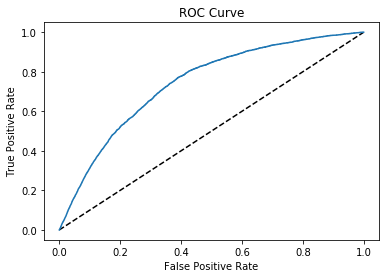

In [106]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lt, tpr_lt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

LogReg on X_train

In [104]:
log_reg = LogisticRegression(C=464.15888336127773)
X1_train,X1_test,y1_train,y1_test = tts(X1,y1,random_state=42,test_size=0.3)
model_log_reg = log_reg.fit(X1_train,y1_train)
y_pred_log_reg = model_log_reg.predict(X1_train)
y_pred_proba_log_reg = model_log_reg.predict_proba(X1_train)[:,1]



print(accuracy_score(y1_train,y_pred_log_reg))
print(classification_report(y1_train,y_pred_log_reg))

from sklearn.metrics import roc_curve,roc_auc_score
fpr_lr,tpr_lr,thresholds = roc_curve(y1_train,y_pred_proba_log_reg)
print(roc_auc_score(y1_train,y_pred_proba_log_reg))# Iterate over probabiliteis and not y_pred



/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6913116700256757
              precision    recall  f1-score   support

           0       0.68      0.73      0.70     90715
           1       0.71      0.65      0.68     90390

   micro avg       0.69      0.69      0.69    181105
   macro avg       0.69      0.69      0.69    181105
weighted avg       0.69      0.69      0.69    181105

0.7704883402333481


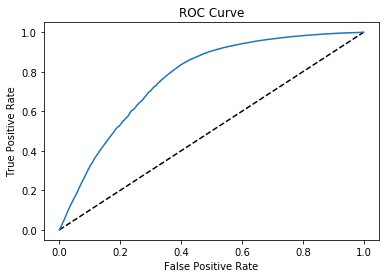

In [105]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

NaiveBayes on X_test

In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_nb = nb.fit(X1_train,y1_train)
y_pred_nb  = model_nb.predict(X_test)
y_pred_proba_nb = model_nb.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))


from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_nb)
roc_auc_score(y_test,y_pred_proba_nb)# Iterate over probabiliteis and not y_pred

0.3753666666666667
              precision    recall  f1-score   support

           0       0.97      0.33      0.50     55384
           1       0.10      0.87      0.18      4616

   micro avg       0.38      0.38      0.38     60000
   macro avg       0.53      0.60      0.34     60000
weighted avg       0.90      0.38      0.47     60000



0.6613379388080722

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

NaiveBayes on X_train

In [84]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_nb = nb.fit(X1_train,y1_train)
y_pred_nb  = model_nb.predict(X1_train)
y_pred_proba_nb = model_nb.predict_proba(X1_train)[:,1]

print(accuracy_score(y1_train,y_pred_nb))
print(classification_report(y1_train,y_pred_nb))


from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y1_train,y_pred_proba_nb)
roc_auc_score(y1_train,y_pred_proba_nb)# Iterate over probabiliteis and not y_pred

0.6363656442395296
              precision    recall  f1-score   support

           0       0.85      0.33      0.48     90715
           1       0.58      0.94      0.72     90390

   micro avg       0.64      0.64      0.64    181105
   macro avg       0.72      0.64      0.60    181105
weighted avg       0.72      0.64      0.60    181105



0.7626654014906846

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Dtc on X_test

In [85]:
from sklearn.tree import DecisionTreeClassifier
seed =42
dtc = DecisionTreeClassifier(random_state=seed,criterion='gini')

In [86]:
params = {"max_depth":np.arange(2,4),
         "min_samples_leaf":np.arange(0.05,0.1,0.01),
         "max_features":np.arange(0.2,0.5,0.1)}

grid_dt = GridSearchCV(estimator=dtc,param_grid=params,
                      cv=10,n_jobs=1,#n_jobs=-1 will run all core processors on gpu
                      scoring="accuracy")

model_dtc=dtc.fit(X1_train,y1_train)



y_pred_dtc=model_dtc.predict(X_test)
print(accuracy_score(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

y_pred_proba_dtc = model_dtc.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_dtc)
roc_auc_score(y_test,y_pred_proba_dtc)# Iterate over probabiliteis and not y_pred

0.8011166666666667
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     55384
           1       0.15      0.34      0.21      4616

   micro avg       0.80      0.80      0.80     60000
   macro avg       0.54      0.59      0.55     60000
weighted avg       0.88      0.80      0.83     60000



0.5880324683958552

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

dtc on X_train

In [87]:
model_dtc=dtc.fit(X1_train,y1_train)



y_pred_dtc=model_dtc.predict(X1_train)
print(accuracy_score(y1_train,y_pred_dtc))
print(classification_report(y1_train,y_pred_dtc))

y_pred_proba_dtc = model_dtc.predict_proba(X1_train)[:,1]

from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y1_train,y_pred_proba_dtc)
print(roc_auc_score(y1_train,y_pred_proba_dtc))# Iterate over probabiliteis and not y_pred

0.9952348085364844
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     90715
           1       1.00      0.99      1.00     90390

   micro avg       1.00      1.00      1.00    181105
   macro avg       1.00      1.00      1.00    181105
weighted avg       1.00      1.00      1.00    181105

0.9999434382516198


In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

XGBoost predict on X_test

In [99]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb=xgb.fit(X1_train, y1_train)
y_pred_xgb = model_xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
fpr_xg,tpr_xg,thresholds = roc_curve(y_test,y_pred_proba_xgb)
print(roc_auc_score(y_test,y_pred_proba_xgb))# Iterate over probabiliteis and not y_pred

0.75505
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     55384
           1       0.17      0.59      0.27      4616

   micro avg       0.76      0.76      0.76     60000
   macro avg       0.57      0.68      0.56     60000
weighted avg       0.90      0.76      0.81     60000

0.753812645416116


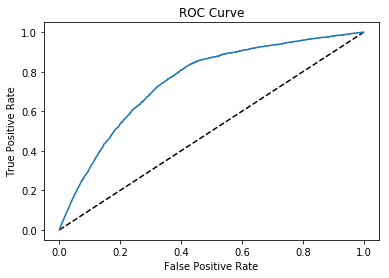

In [100]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xg, tpr_xg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

XGBoost on X_train

In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb=xgb.fit(X1_train, y1_train)
y_pred_xgb = model_xgb.predict(X1_train)
print(accuracy_score(y1_train,y_pred_xgb))
print(classification_report(y1_train,y_pred_xgb))

y_pred_proba_xgb = model_xgb.predict_proba(X1_train)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
fpr_xt,tpr_xt,thresholds = roc_curve(y1_train,y_pred_proba_xgb)
print(roc_auc_score(y1_train,y_pred_proba_xgb))# Iterate over probabiliteis and not y_pred

0.8221639380469893
              precision    recall  f1-score   support

           0       0.86      0.77      0.81     90715
           1       0.79      0.88      0.83     90390

   micro avg       0.82      0.82      0.82    181105
   macro avg       0.83      0.82      0.82    181105
weighted avg       0.83      0.82      0.82    181105

0.9078333793927833


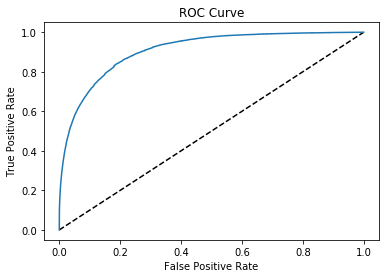

In [102]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xt, tpr_xt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

RFC on X_test

In [91]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X1_train,y1_train)
y_pred_rfc = model_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

y_pred_proba_rfc = model_dtc.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_rfc)
roc_auc_score(y_test,y_pred_proba_rfc)# Iterate over probabiliteis and not y_pred

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8403166666666667
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     55384
           1       0.19      0.32      0.23      4616

   micro avg       0.84      0.84      0.84     60000
   macro avg       0.56      0.60      0.57     60000
weighted avg       0.88      0.84      0.86     60000



0.5880324683958552

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

RFC on X_train

In [92]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X1_train,y1_train)
y_pred_rfc = model_rfc.predict(X1_train)
print(accuracy_score(y1_train,y_pred_rfc))
print(classification_report(y1_train,y_pred_rfc))

y_pred_proba_rfc = model_dtc.predict_proba(X1_train)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y1_train,y_pred_proba_rfc)
roc_auc_score(y1_train,y_pred_proba_rfc)# Iterate over probabiliteis and not y_pred

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9892990254272384
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     90715
           1       0.99      0.99      0.99     90390

   micro avg       0.99      0.99      0.99    181105
   macro avg       0.99      0.99      0.99    181105
weighted avg       0.99      0.99      0.99    181105



0.9999434382516198

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()